In [4]:
# How to import the module
import copy as cp
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import sys
sys.path.insert(1, './library_v2')

In [6]:
# Import module
import subdomain as sub
import configuration as cfg
import experiment as exp
import inputdata as ipt
import analytical as ana
import subdomain as sub
import weightedresiduals as wrm
import mom_cg_fft as mom
import bim

In [8]:
experiment_name = 'debug_experiment'
saved_files_path = './debug/files/'

# Set up experiment object
myexp = exp.Experiment(import_filename=experiment_name,
                       import_filepath=saved_files_path)

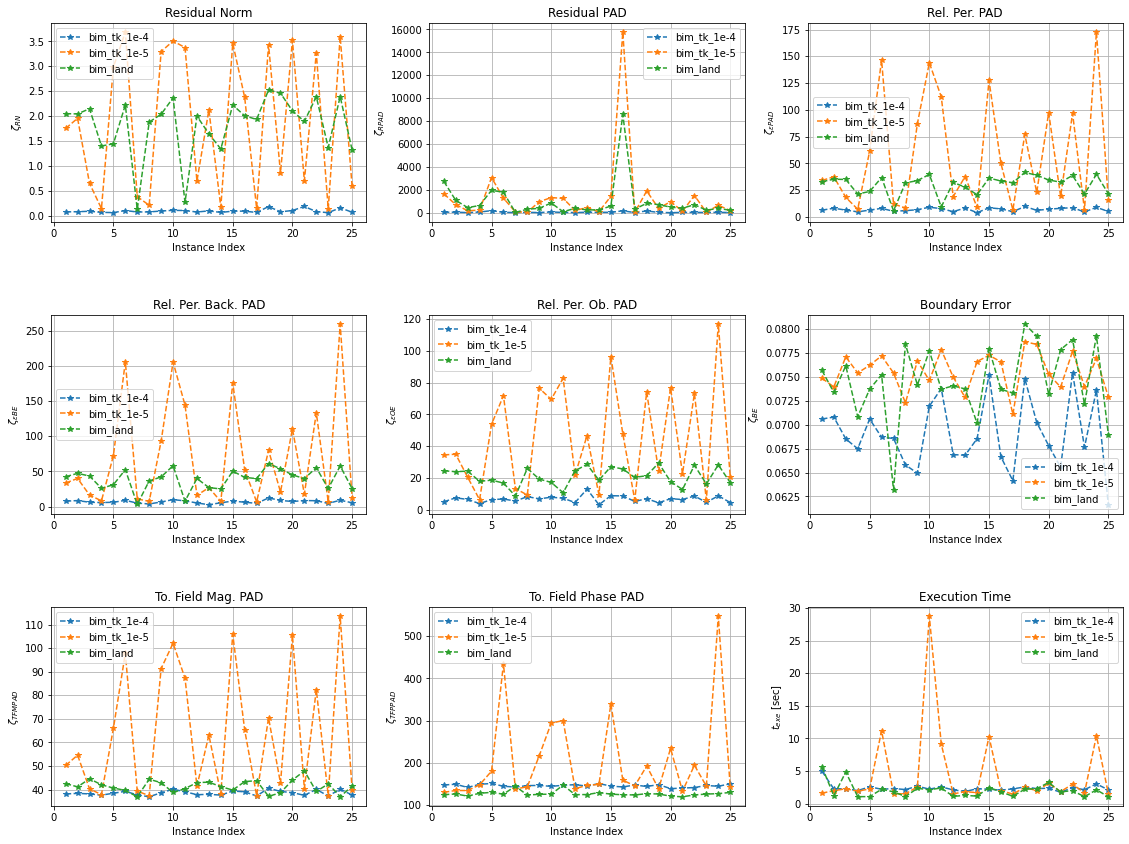

In [9]:
# Compare each observation of a single sample for all measure
myexp.fixed_sampleset_plot(method_idx=[0, 1, 2],
                           file_path=saved_files_path,
                           file_format='eps',
                           show=True)